In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from time import time
from sklearn.model_selection import train_test_split as sp
from sklearn.feature_extraction.text import CountVectorizer as vecto
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import zipfile

In [38]:
from keras import preprocessing

In [39]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
z= zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/YouTube-Spam-Collection-v1.zip")
Psy=pd.read_csv(z.open("Youtube01-Psy.csv"))
KatyPerry  =pd.read_csv(z.open("Youtube02-KatyPerry.csv"))
LMFAQ =pd.read_csv(z.open("Youtube03-LMFAO.csv"))
Eminem =pd.read_csv(z.open("Youtube04-Eminem.csv"))
Shakira =pd.read_csv(z.open("Youtube05-Shakira.csv"))
frames = [Psy,LMFAQ,Eminem,Shakira,KatyPerry]
data = pd.concat(frames)
data.head(10)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,1
9,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [41]:
data.count()

COMMENT_ID    1956
AUTHOR        1956
DATE          1711
CONTENT       1956
CLASS         1956
dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data['CONTENT'], data['CLASS'], test_size = 0.30)

Y_train = pd.get_dummies(Y_train).values

In [43]:
from keras.preprocessing.text import text_to_word_sequence
temp = []
for i in range(len(X_train)):
    words = []
    rev = str(X_train.iloc[i])
    rev = text_to_word_sequence(rev)
    temp.append(rev)
X_train = temp

In [44]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_features = 3000

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train)

In [45]:
from keras.preprocessing import sequence

In [46]:
test_sequences=tokenizer.texts_to_sequences(X_test)
test_sequences_matrix=sequence.pad_sequences(test_sequences,maxlen=128)

In [47]:
tokenizer.texts_to_sequences('how are you')

[[935], [719], [844], [], [9], [568], [271], [], [647], [719], [85]]

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Dense,Bidirectional

In [49]:
from keras.layers import Activation, Dense

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:


embed_dim = 128
lstm_out = 196


model = Sequential()
model.add(
    Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(LSTM(lstm_out, dropout=0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 216, 128)          384000    
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 639,194
Trainable params: 639,194
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 216, 128)          384000    
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 639,194
Trainable params: 639,194
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [54]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
          
           ]

In [55]:
model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [59]:
history=model.fit(X_train, Y_train, epochs=10, batch_size=20,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
62/62 [==============================] - 34s 556ms/step - loss: 0.0137 - accuracy: 0.9959 - precision: 0.9959 - recall: 0.9959 - val_loss: 0.1054 - val_accuracy: 0.9708 - val_precision: 0.9708 - val_recall: 0.9708
Epoch 2/10
62/62 [==============================] - 32s 511ms/step - loss: 0.0110 - accuracy: 0.9976 - precision: 0.9976 - recall: 0.9976 - val_loss: 0.0410 - val_accuracy: 0.9781 - val_precision: 0.9781 - val_recall: 0.9781
Epoch 3/10
62/62 [==============================] - 33s 536ms/step - loss: 0.0142 - accuracy: 0.9968 - precision: 0.9968 - recall: 0.9968 - val_loss: 0.0465 - val_accuracy: 0.9781 - val_precision: 0.9781 - val_recall: 0.9781
Epoch 4/10
62/62 [==============================] - 33s 535ms/step - loss: 0.0042 - accuracy: 0.9992 - precision: 0.9992 - recall: 0.9992 - val_loss: 0.0832 - val_accuracy: 0.9708 - val_precision: 0.9708 - val_recall: 0.9708
Epoch 5/10
62/62 [==============================] - 32s 510ms/step - loss: 0.0016 - accuracy: 1.0000

In [60]:
from matplotlib import pyplot

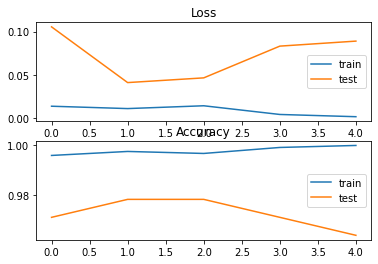

In [61]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()